In [1]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
import peaks_utility as psu
from multihist import Hist1d, Histdd

Start import
Working on midway2-0416.rcc.local with the following versions 
and installation paths:
strax
	v0.12.2	/dali/lgrandi/strax/strax/strax
straxen
	v0.11.0	/dali/lgrandi/strax/straxen/straxen



In [2]:
st = straxen.contexts.xenonnt_online()

In [3]:
st.set_context_config({'check_available': ('raw_records', 'records', 'peaklets', 'peak_basics')})
st.select_runs()

Checking data availability: 100%|██████████| 4/4 [01:04<00:00, 16.19s/it]


name number                                      mode  \
0    009630   9630  tpc_selftrigger_commissioning_highthresh   
1    009629   9629  tpc_selftrigger_commissioning_highthresh   
2    009628   9628  tpc_selftrigger_commissioning_highthresh   
3    009627   9627  tpc_selftrigger_commissioning_highthresh   
4    009626   9626  tpc_selftrigger_commissioning_highthresh   
..      ...    ...                                       ...   
354  009276   9276             tpc_selftrigger_commissioning   
355  009275   9275             tpc_selftrigger_commissioning   
356  009274   9274             tpc_selftrigger_commissioning   
357  009273   9273                                 tpc_noise   
358  009272   9272                                 tpc_noise   

                      start                     end   tags        livetime  \
0   2020-10-26 06:16:21.600 2020-10-26 07:16:23.963        01:00:02.363000   
1   2020-10-26 05:15:49.822 2020-10-26 06:15:52.318        01:00:02.496000   
2   2020-10-26 04:15:14.889 2020-10-26 05:15:17.614        01:00:02.725000   
3   2020-10-26 03:14:41.769 2020-10-26 04:14:42.665        01:00:00.896000   
4   2020-10-26 02:14:10.459 2020-10-26 03:14:12.486        01:00:02.027000   
..                      ...                     ...    ...             ...   
354 2020-10-07 12:38:18.278 2020-10-07 12:38:53.320        00:00:35.042000   
355 2020-10-07 12:33:23.865 2020-10-07 12:34:02.911  messy 00:00:39.046000   
356 2020-10-07 12:31:07.650 2020-10-07 12:31:39.688        00:00:32.038000   
357 2020-10-07 12:29:54.507 2020-10-07 12:30:44.564        00:00:50.057000   
358 2020-10-07 12:28:10.334 2020-10-07 12:28:45.375        00:00:35.041000   

     peak_basics_available  records_available  raw_records_available  \
0                     True               True                  False   
1                     True               True                  False   
2                     True               True                  False   
3                     True               True                  False   
4                     True               True                  False   
..                     ...                ...                    ...   
354                  False               True                  False   
355                  False               True                  False   
356                  False              False                  False   
357                  False              False                  False   
358                  False              False                  False   

     peaklets_available  
0                  True  
1                  True  
2                  True  
3                  True  
4                  True  
..                  ...  
354               False  
355               False  
356               False  
357               False  
358               False  

[359 rows x 11 columns]

In [27]:
st.select_runs(run_id ='009*',run_mode='electrode_test', available = 'peaklets', exclude_tags = ('bad', 'messy'))

name number            mode                   start  \
62   009568   9568  electrode_test 2020-10-23 16:57:13.873   
63   009567   9567  electrode_test 2020-10-23 15:54:30.343   
64   009566   9566  electrode_test 2020-10-23 15:48:08.441   
65   009565   9565  electrode_test 2020-10-23 15:36:56.161   
66   009564   9564  electrode_test 2020-10-23 15:30:25.074   
67   009563   9563  electrode_test 2020-10-23 15:23:51.001   
68   009562   9562  electrode_test 2020-10-23 15:17:32.173   
69   009561   9561  electrode_test 2020-10-23 15:10:12.812   
70   009560   9560  electrode_test 2020-10-23 15:01:07.673   
71   009559   9559  electrode_test 2020-10-23 14:39:11.641   
72   009558   9558  electrode_test 2020-10-23 14:14:20.206   
85   009545   9545  electrode_test 2020-10-22 18:13:48.270   
86   009544   9544  electrode_test 2020-10-22 18:07:50.425   
87   009543   9543  electrode_test 2020-10-22 18:01:58.681   
88   009542   9542  electrode_test 2020-10-22 17:55:57.913   
89   009541   9541  electrode_test 2020-10-22 17:48:17.363   
90   009540   9540  electrode_test 2020-10-22 17:41:28.261   
91   009539   9539  electrode_test 2020-10-22 17:35:27.438   
92   009538   9538  electrode_test 2020-10-22 17:29:29.683   
93   009537   9537  electrode_test 2020-10-22 17:25:08.647   
94   009536   9536  electrode_test 2020-10-22 17:19:19.913   
95   009535   9535  electrode_test 2020-10-22 16:57:50.030   
96   009534   9534  electrode_test 2020-10-22 16:52:40.834   
97   009533   9533  electrode_test 2020-10-22 16:46:46.325   
98   009532   9532  electrode_test 2020-10-22 16:40:24.511   
99   009531   9531  electrode_test 2020-10-22 16:34:30.031   
100  009530   9530  electrode_test 2020-10-22 16:28:08.314   
101  009529   9529  electrode_test 2020-10-22 16:17:08.635   
102  009528   9528  electrode_test 2020-10-22 15:25:27.456   
106  009524   9524  electrode_test 2020-10-21 18:03:54.133   
107  009523   9523  electrode_test 2020-10-21 17:46:03.174   
108  009522   9522  electrode_test 2020-10-21 17:35:02.158   
109  009521   9521  electrode_test 2020-10-21 17:22:43.604   
110  009520   9520  electrode_test 2020-10-21 17:14:56.994   
114  009516   9516  electrode_test 2020-10-21 16:55:57.516   
115  009515   9515  electrode_test 2020-10-21 16:50:14.893   
116  009514   9514  electrode_test 2020-10-21 16:36:53.918   
117  009513   9513  electrode_test 2020-10-21 16:30:59.203   
118  009512   9512  electrode_test 2020-10-21 16:19:04.806   
119  009511   9511  electrode_test 2020-10-21 16:03:23.627   
120  009510   9510  electrode_test 2020-10-21 15:45:12.120   
121  009509   9509  electrode_test 2020-10-21 15:37:55.882   

                        end tags        livetime  peak_basics_available  \
62  2020-10-23 17:28:16.375      00:31:02.502000                   True   
63  2020-10-23 16:54:31.701      01:00:01.358000                   True   
64  2020-10-23 15:53:09.826      00:05:01.385000                   True   
65  2020-10-23 15:46:35.759      00:09:39.598000                   True   
66  2020-10-23 15:35:26.519      00:05:01.445000                   True   
67  2020-10-23 15:29:07.521      00:05:16.520000                   True   
68  2020-10-23 15:22:33.419      00:05:01.246000                   True   
69  2020-10-23 15:16:41.727      00:06:28.915000                   True   
70  2020-10-23 15:08:43.113      00:07:35.440000                   True   
71  2020-10-23 15:00:38.467      00:21:26.826000                   True   
72  2020-10-23 14:38:42.437      00:24:22.231000                   True   
85  2020-10-22 18:28:51.243      00:15:02.973000                   True   
86  2020-10-22 18:12:51.786      00:05:01.361000                   True   
87  2020-10-22 18:07:21.213      00:05:22.532000                   True   
88  2020-10-22 18:00:59.265      00:05:01.352000                   True   
89  2020-10-22 17:55:07.540      00:06:50.177000                   True   
90  2020-10-22 17:46:29.639      00:05:01.378000                 

In [4]:
def plot_area_width(st, run_id = '009510'):
    if (st.is_stored(run_id, "peak_basics")):
        #peaks = st.get_array(run_id, targets = ('peak_basics'), #seconds_range = (0, 10),
                             #progress_bar=False)
        #print(f'Loaded {peaks.nbytes/1e6:.1f} MB of peaks-data')
        data = psu.select_data(st,run_id)
        psu.plot_area_width(data,0,4.5,1,4)
        
    else: print('peak_basics is not stored')

In [5]:
from multihist import Hist1d, Histdd
def plot_area_runs(runs,cathodev,log,lowl, highl):
    plt.figure(figsize=(12,6))
    for i, run in enumerate(runs):
        peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
        livetime = (peaks['time'][len(peaks)-1]-peaks['time'][0])/1e9
        npmt = np.max(peaks['n_channels'])
        print('Run',run,'livetime:',livetime,'s, cathode at',cathodev[i],'kV, n. PMT',npmt)
        if (log): p_area = Hist1d(peaks['area'], bins=(np.logspace(lowl, highl, 500)))
        else: p_area = Hist1d(peaks['area'], bins=(np.linspace(lowl, highl, 500)))
        p_area /= (livetime)
        p_area.plot(label=f'{run} cathode at {cathodev[i]} kV')
    plt.xlabel("peak area (PE)", ha='right', x=1)
    plt.ylabel("events/s", ha='right', y=1)
    if (log): plt.xscale('log')
    plt.legend()

In [7]:
#1st test 21/10/2020
runs = ('009510','009512','009514','009516','009521','009523')
#runs = ('009510','009511','009512','009513','009514',
#        '009515','009516','009520','009521','009522','009523')
cathode = ('0','1','2','3','4','5')
#cathode = ('0','0.5','1','1.5','2','2.5','3','3.5','4','4.5','5')
#2nd test 22/10/2020
runs2 = ('009529','009531','009533','009535','009536','009538','009540','009542','009544')
cathode2 = ('-5','-6','-7','-8','-8','-9','-10','-11','-12')
#3rd test 23/10/2020
runs3 = ('009560','009562','009564','009566')
cathode3 = ('-12','-13','-14','-15')
#total runs
runs_tot = ('009510','009512','009514','009516','009521','009523',
            '009529','009531','009533','009535','009536','009538','009540','009542','009544',
            '009560','009562','009564','009566')
cathode_tot = ('0','1','2','3','4','5',
               '5','6','7','8','8','9','10','11','12',
               '12','13','14','15')

Run 009510 livetime: 679.02602676 s, cathode at 0 kV, n. PMT 10
Run 009512 livetime: 700.24113219 s, cathode at -1 kV, n. PMT 10
Run 009514 livetime: 751.56068539 s, cathode at -2 kV, n. PMT 10
Run 009516 livetime: 664.01024143 s, cathode at -3 kV, n. PMT 10
Run 009521 livetime: 627.70145658 s, cathode at -4 kV, n. PMT 10
Run 009523 livetime: 730.50603554 s, cathode at -5 kV, n. PMT 10


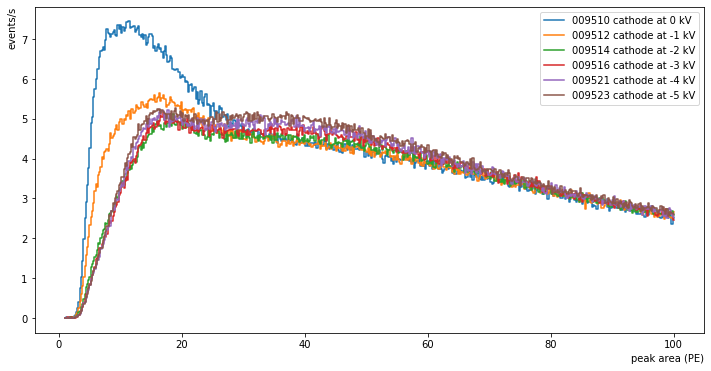

In [39]:
plot_area_runs(runs,cathode,0,1,100)

Run 009510 livetime: 679.02602676 s cathode at 0 kV
Run 009512 livetime: 700.24113219 s cathode at -1 kV
Run 009514 livetime: 751.56068539 s cathode at -2 kV
Run 009516 livetime: 664.01024143 s cathode at -3 kV
Run 009521 livetime: 627.70145658 s cathode at -4 kV
Run 009523 livetime: 730.50603554 s cathode at -5 kV


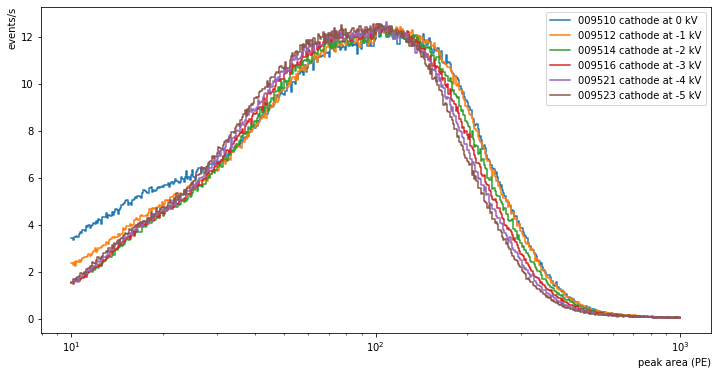

In [32]:
plot_area_runs(runs,cathode,1,1,3)

Run 009529 livetime: 600.30607248 s, cathode at -5 kV, n. PMT 10
Run 009531 livetime: 301.21366105 s, cathode at -6 kV, n. PMT 10
Run 009533 livetime: 301.14475109 s, cathode at -7 kV, n. PMT 10
Run 009535 livetime: 301.19928358 s, cathode at -8 kV, n. PMT 10
Run 009536 livetime: 301.29415599 s, cathode at -8 kV, n. PMT 15
Run 009538 livetime: 301.35453814 s, cathode at -9 kV, n. PMT 15
Run 009540 livetime: 301.37820133 s, cathode at -10 kV, n. PMT 15
Run 009542 livetime: 301.35311316 s, cathode at -11 kV, n. PMT 15
Run 009544 livetime: 301.36168035 s, cathode at -12 kV, n. PMT 15


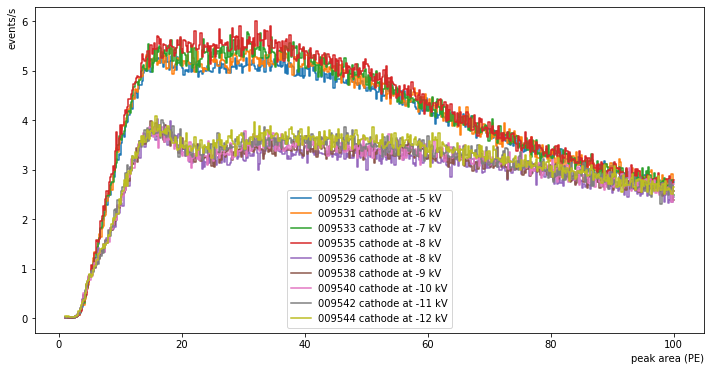

In [41]:
plot_area_runs(runs2,cathode2,0,1,100)

Run 009529 livetime: 600.30607248 s, cathode at -5 kV, n. PMT 10
Run 009531 livetime: 301.21366105 s, cathode at -6 kV, n. PMT 10
Run 009533 livetime: 301.14475109 s, cathode at -7 kV, n. PMT 10
Run 009535 livetime: 301.19928358 s, cathode at -8 kV, n. PMT 10
Run 009536 livetime: 301.29415599 s, cathode at -8 kV, n. PMT 15
Run 009538 livetime: 301.35453814 s, cathode at -9 kV, n. PMT 15
Run 009540 livetime: 301.37820133 s, cathode at -10 kV, n. PMT 15
Run 009542 livetime: 301.35311316 s, cathode at -11 kV, n. PMT 15
Run 009544 livetime: 301.36168035 s, cathode at -12 kV, n. PMT 15


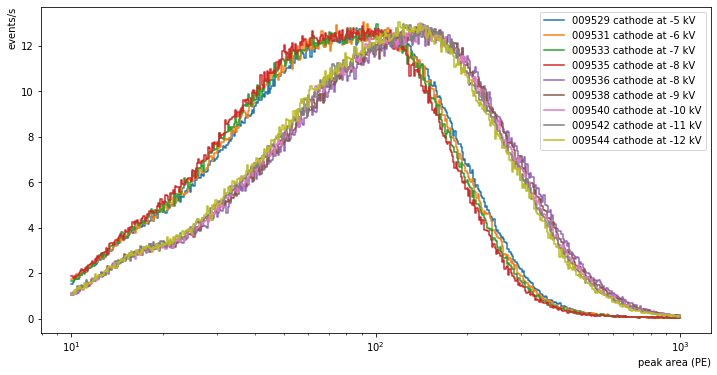

In [42]:
plot_area_runs(runs2,cathode2,1,1,3)

Run 009560 livetime: 455.44065004 s, cathode at -12 kV, n. PMT 15
Run 009562 livetime: 301.24692351 s, cathode at -13 kV, n. PMT 15
Run 009564 livetime: 301.44607014 s, cathode at -14 kV, n. PMT 15
Run 009566 livetime: 301.38582457 s, cathode at -15 kV, n. PMT 15


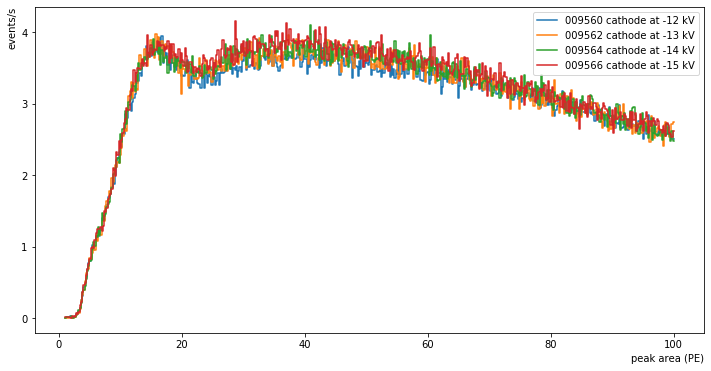

In [36]:
plot_area_runs(runs3,cathode3,0,1,100)

Run 009560 livetime: 455.44065004 s, cathode at -12 kV, n. PMT 15
Run 009562 livetime: 301.24692351 s, cathode at -13 kV, n. PMT 15
Run 009564 livetime: 301.44607014 s, cathode at -14 kV, n. PMT 15
Run 009566 livetime: 301.38582457 s, cathode at -15 kV, n. PMT 15


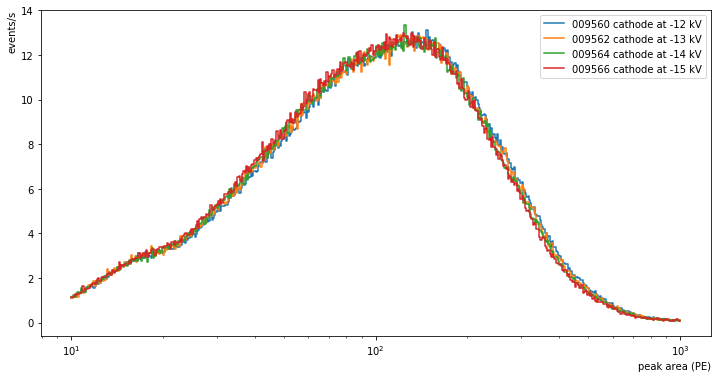

In [35]:
plot_area_runs(runs3,cathode3,1,1,3)

In [14]:
area_cut1 = (30,1000)
area_cut2 = (5,20)
area_cut3 = (50,500)
area_cut4 = (8,25)
width_cut1 = (50,150)
width_cut2 = (200,1000)
width_cut3 = (1500,5000)
width_cut4 = (25,50)

<Figure size 864x432 with 0 Axes>

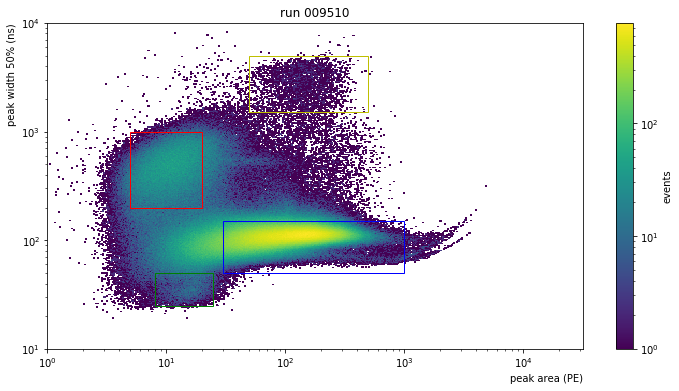

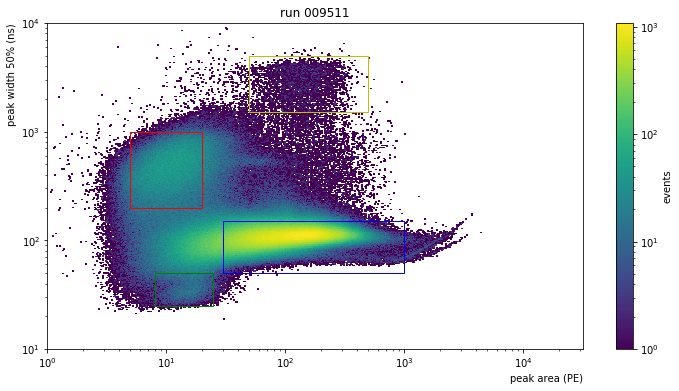

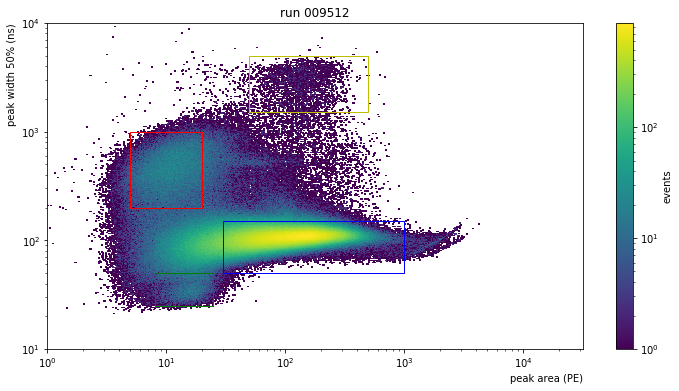

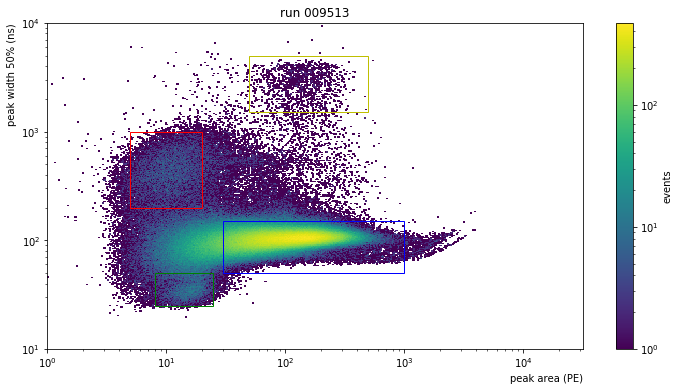

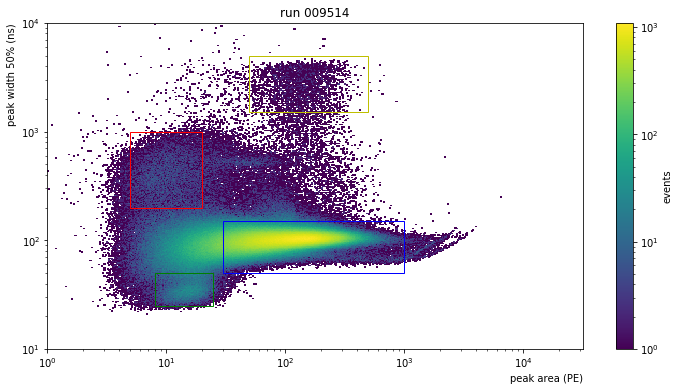

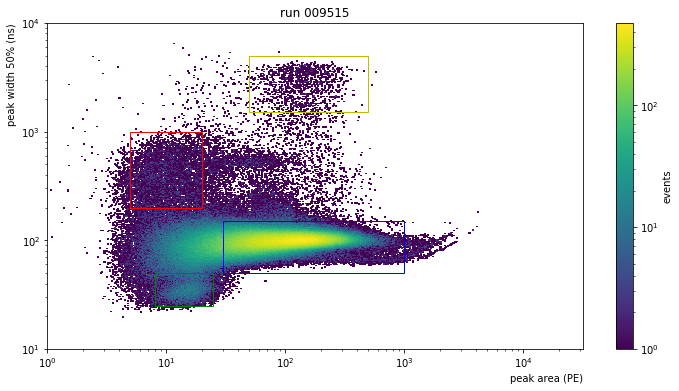

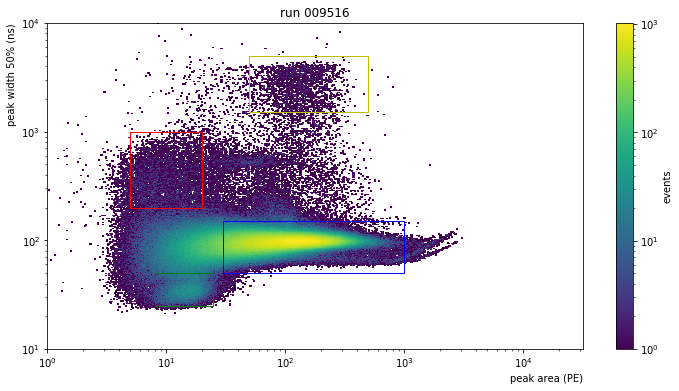

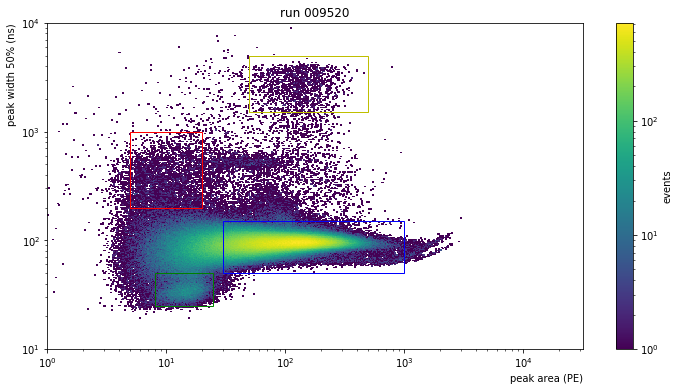

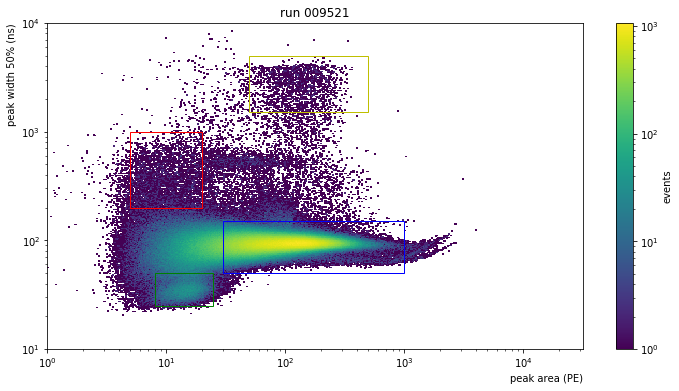

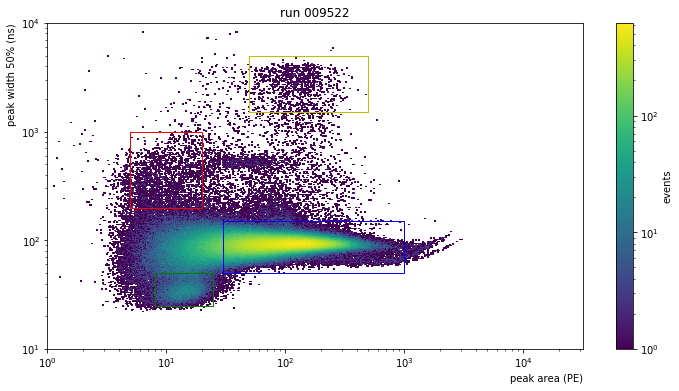

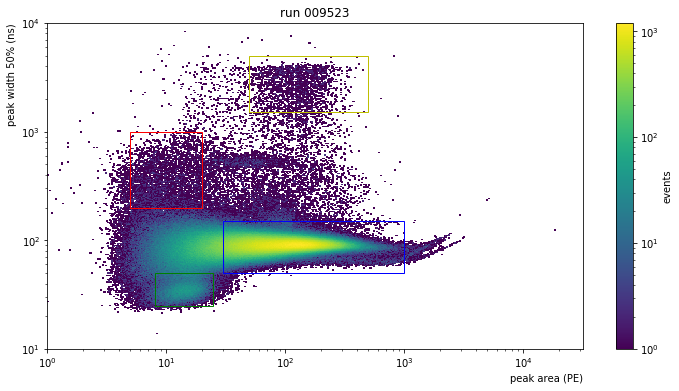

In [10]:
for i, run in enumerate(runs):
    plt.figure(i+1,figsize=(12,6))
    peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
    psu.plot_area_width(peaks,0,4.5,1,4)
    psu.rectangle(area_cut1,width_cut1,'b')
    psu.rectangle(area_cut2,width_cut2,'r')
    psu.rectangle(area_cut3,width_cut3,'y')
    psu.rectangle(area_cut4,width_cut4,'g')
    plt.title(f'run {run}')

In [3]:
def calculate_events(data,area_cut,width_cut,aft_cut=(0,1),ndiv=1):
    livetime = (data['time'][len(data)-1]-data['time'][0])#/1e9
    for i in range(ndiv):
        events = len(data[(data['area']<area_cut[1]) & (data['area']>area_cut[0]) &
                          (data['range_50p_area']<width_cut[1]) &
                          (data['range_50p_area']>width_cut[0]) &
                          (data['area_fraction_top']>aft_cut[0]) &
                          (data['area_fraction_top']<aft_cut[1]) &
                          (data['time']>(data['time'][0]+i*livetime/ndiv)) &
                          (data['time']<(data['time'][0]+(i+1)*livetime/ndiv))])
        rate = events/(livetime/1e9/ndiv)/np.max(data['n_channels'])
        rate_err = rate**0.5
        #print('interval',i,'rate',rate,'+/-',rate_err)
    return rate, rate_err

In [11]:
def plot_rate(runs):
    rate1, rate1e = np.zeros(len(runs)), np.zeros(len(runs))
    rate2, rate2e = np.zeros(len(runs)), np.zeros(len(runs))
    rate3, rate3e = np.zeros(len(runs)), np.zeros(len(runs))
    rate4, rate4e = np.zeros(len(runs)), np.zeros(len(runs))
    for i, run in enumerate(runs):
        peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
        rate1[i],rate1e[i] = calculate_events(peaks,area_cut1,width_cut1)
        rate2[i],rate2e[i] = calculate_events(peaks,area_cut2,width_cut2)
        rate3[i],rate3e[i] = calculate_events(peaks,area_cut3,width_cut3)
        rate4[i],rate4e[i] = calculate_events(peaks,area_cut4,width_cut4)
        #print(f'run {run} rate events {rate1[i]} {rate2[i]} {rate3[i]} {rate4[i]}')
    #plt.figure(figsize=(10,5))
    fig, axs = plt.subplots(4,figsize=(12,8))
    axs[0].plot(runs,rate1,marker='o',color='b',label='S1 region')
    axs[1].plot(runs,rate2,marker='o',color='r',label='low area')
    axs[2].plot(runs,rate3,marker='o',color='y',label='high width')
    axs[3].plot(runs,rate4,marker='o',color='g',label='low area&width')
    #axs[0].errorbar(runs,rate1,rate1e,marker='o',color='b',label='S1 region')
    #axs[1].errorbar(runs,rate2,rate2e,marker='o',color='r',label='low area')
    #axs[2].errorbar(runs,rate3,rate3e,marker='o',color='y',label='high width')
    #axs[3].errorbar(runs,rate4,rate4e,marker='o',color='g',label='low area&width')
    axs[3].set_xlabel('run', ha='right', x=1)
    for i in range(0,4):
        axs[i].set_ylabel('events/s/PMT', ha='right', y=1)
        axs[i].legend()

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


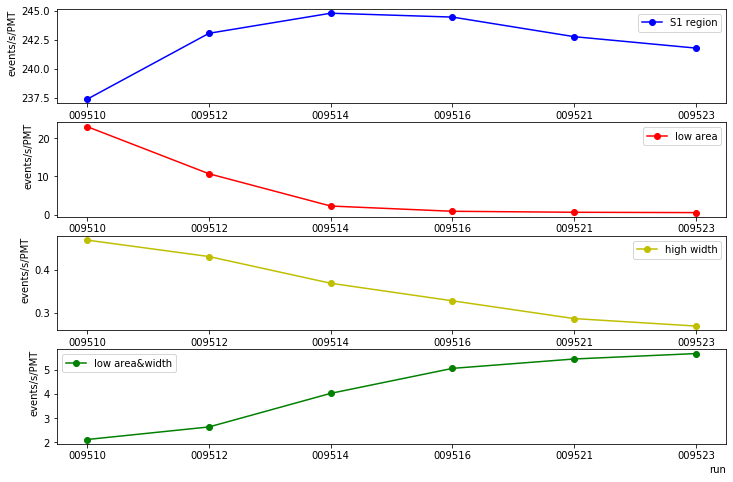

In [75]:
plot_rate(runs)

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


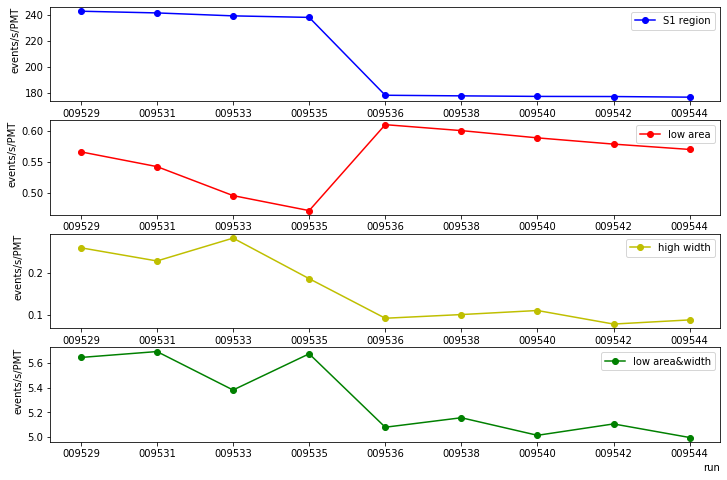

In [76]:
plot_rate(runs2)

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


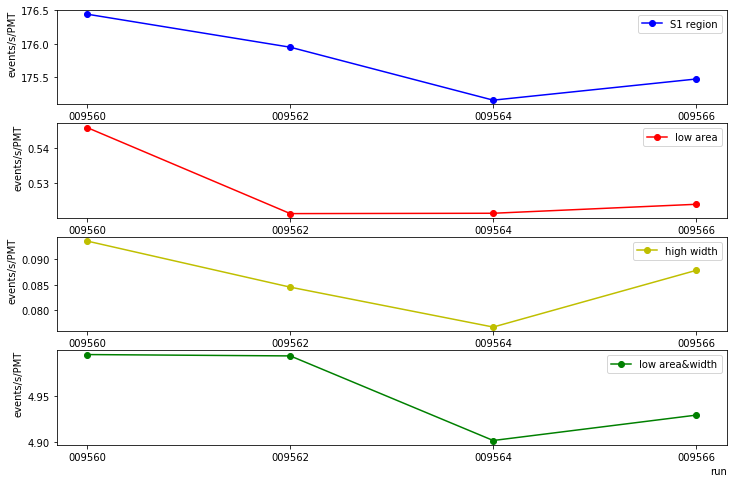

In [77]:
plot_rate(runs3)

In [32]:
def plot_rate_region4(runs,cathode,aft_cut=(0,1)):
    rate4, rate4e = np.zeros(len(runs)), np.zeros(len(runs))
    for i, run in enumerate(runs):
        peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
        rate4[i],rate4e[i] = calculate_events(peaks,area_cut4,width_cut4,aft_cut)
    fig, ax1 = plt.subplots(figsize=(14,4))
    ax1.set_xlabel('run', ha='right', x=1,fontsize='12')
    ax1.set_ylabel('events/s/PMT', ha='right', y=1,fontsize='12')
    ax1.plot(runs, rate4, marker='o',color='g',label='low area&width')
    ax1.tick_params(axis='y')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('cathode voltage (kV)', ha='right', y=1,fontsize='12')
    ax2.plot(runs, cathode, color='r',label='cathode voltage')
    ax2.tick_params(axis='y')
    #plt.figure(figsize=(16,4))
    #plt.plot(runs,rate4,marker='o',color='g',label='low area&width')
    #plt.xlabel('run', ha='right', x=1)
    #plt.ylabel('events/s/PMT', ha='right', y=1)
    plt.text(7.5,2.5, '10 PMTs', fontsize=16, color='k')
    plt.text(10,2.5, '15 PMTs', fontsize=16, color='k')
    plt.axvline(x=9.5, ymin=0, ymax = 1, linewidth=1, linestyle='--',color='k')
    plt.legend()

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


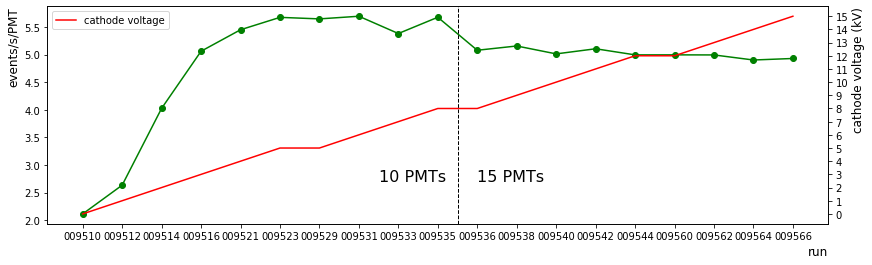

In [33]:
plot_rate_region4(runs_tot,cathode_tot)

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


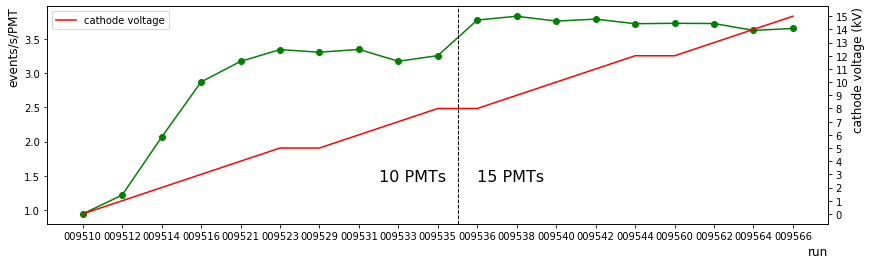

In [34]:
plot_rate_region4(runs_tot,cathode_tot,(0,0.1))

/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


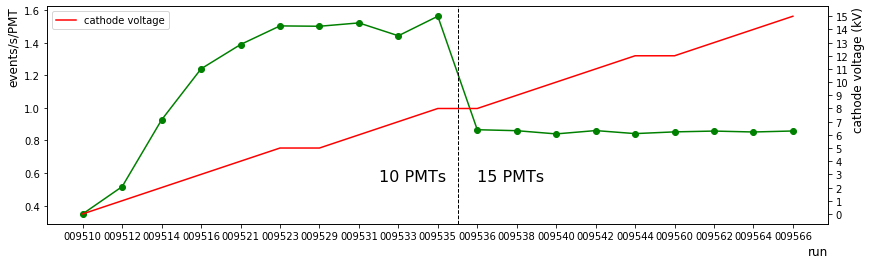

In [35]:
plot_rate_region4(runs_tot,cathode_tot,(0.9,1))

In [3]:
def plotwf(peaks,nn,area_cut,width_cut,color='b'):
    peaks=peaks[(peaks['area']<area_cut[1])&(peaks['area']>area_cut[0])&
                     (peaks['range_50p_area']<width_cut[1])&
                      (peaks['range_50p_area']>width_cut[0])]
    dt = peaks['dt'][0]
    print('total number of records',peaks['data'].shape[0])
    dts = np.arange(0,peaks['data'].shape[1]*dt,dt)
    fig, axs = plt.subplots(nn,figsize=(12,8))
    #plt.figure(figsize=(12,6))
    for i in range(nn):
        axs[i].plot(dts,peaks['data'][i],drawstyle='steps',color=color)
        axs[i].set_xlabel("time (ns)", ha='right', x=1)
        axs[i].set_ylabel(f"ADC", ha='right', y=1)

In [18]:
peaks0 = st.get_array('009510',['peaks','peak_basics'],seconds_range=(0,10),progress_bar=False)
peaks3 = st.get_array('009516',['peaks','peak_basics'],seconds_range=(0,10),progress_bar=False)
peaks5 = st.get_array('009523',['peaks','peak_basics'],seconds_range=(0,10),progress_bar=False)

total number of records 20577
total number of records 73
total number of records 15
total number of records 410


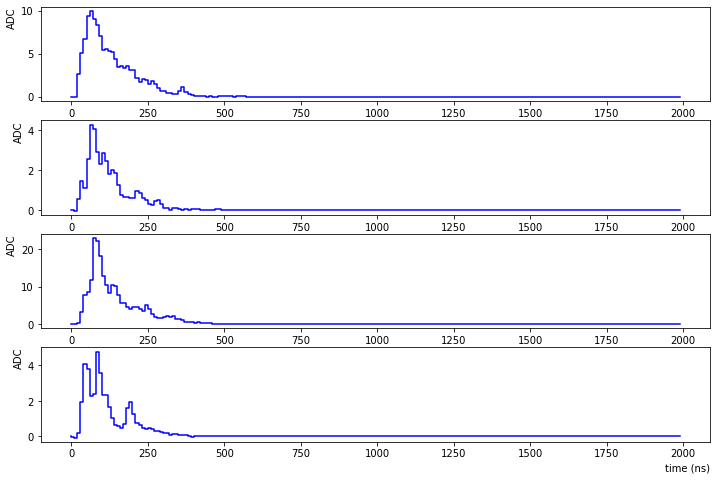

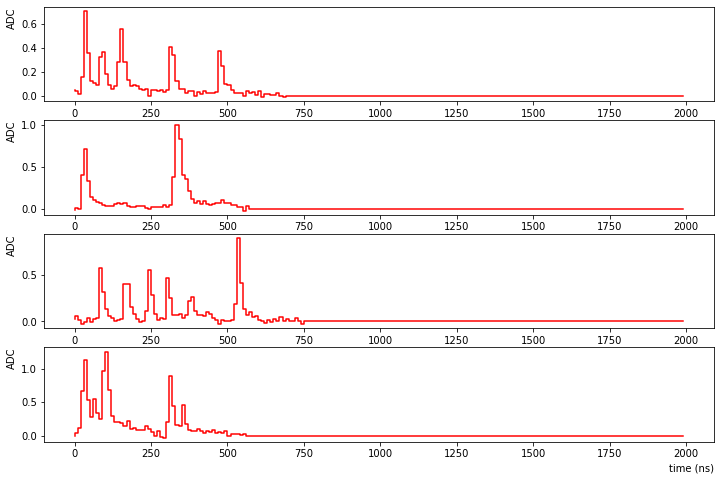

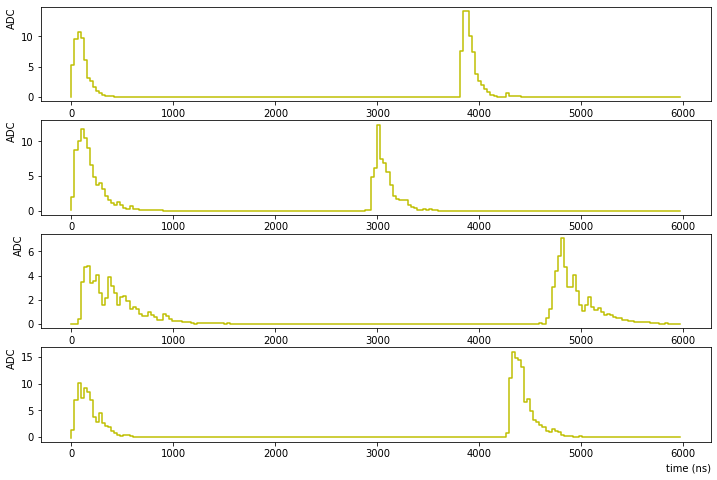

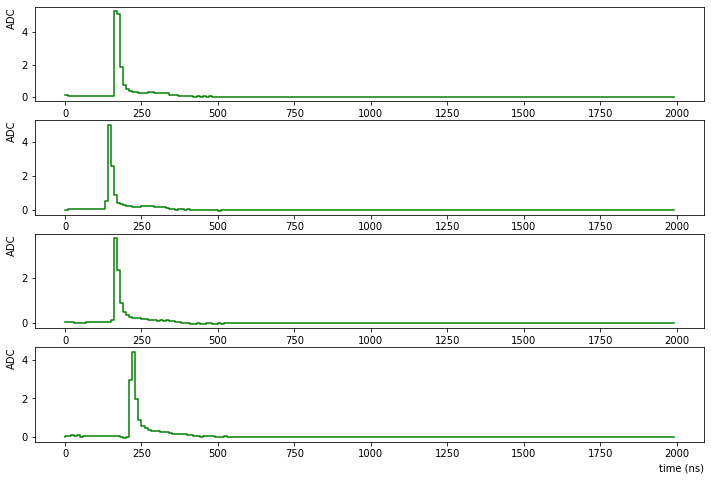

In [35]:
peaks=peaks5
plotwf(peaks,4,area_cut1,width_cut1,'b')
plotwf(peaks,4,area_cut2,width_cut2,'r')
plotwf(peaks,4,area_cut3,width_cut3,'y')
plotwf(peaks,4,area_cut4,width_cut4,'g')

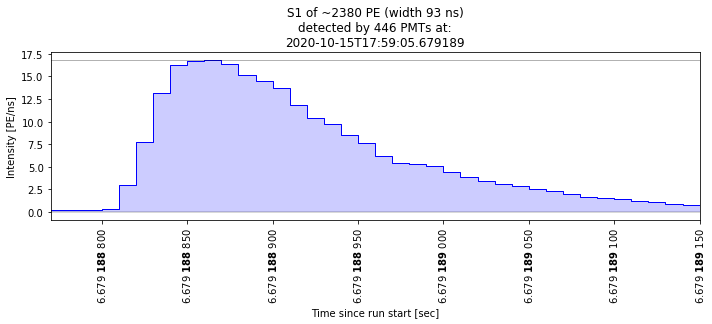

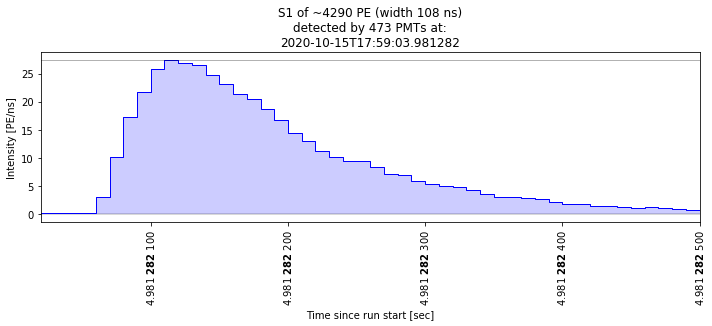

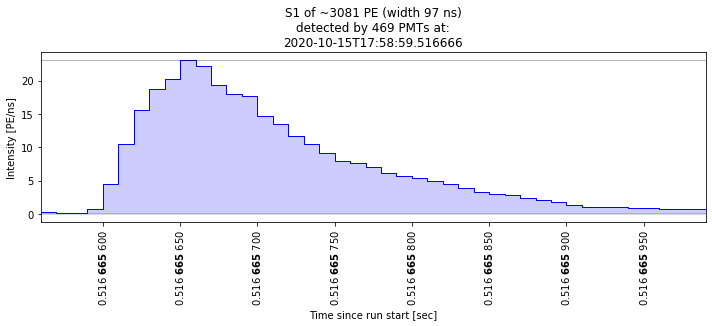

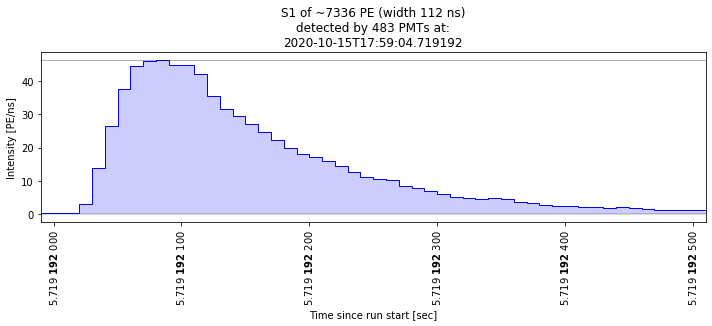

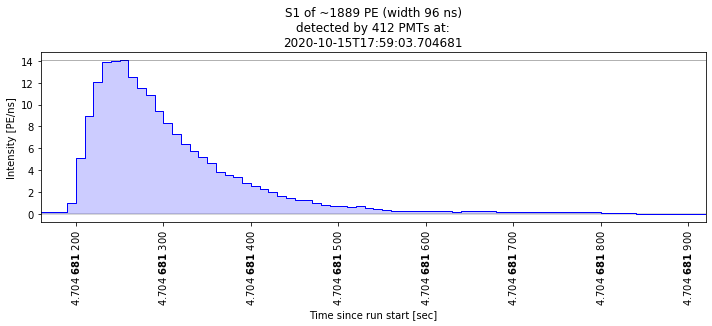

In [48]:
plot_some_peaks(selected_peaks1, max_plots = 5, randomize = 1)

<Figure size 864x432 with 0 Axes>

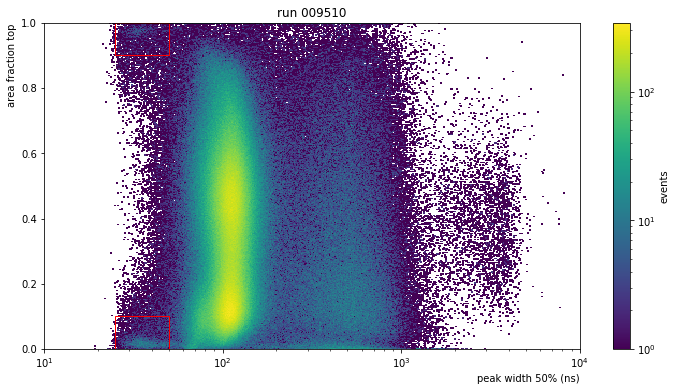

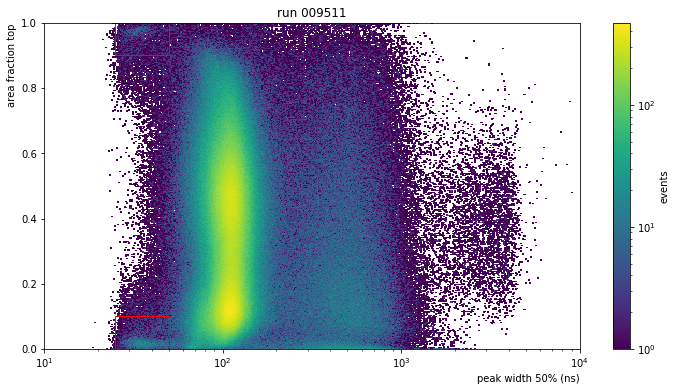

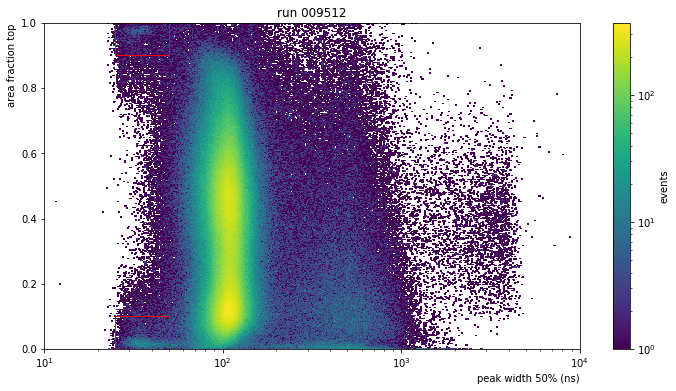

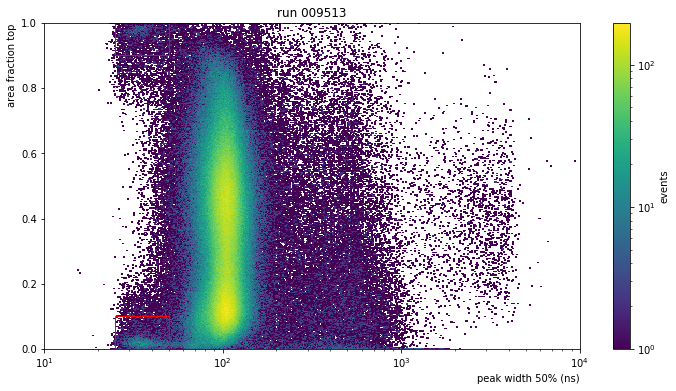

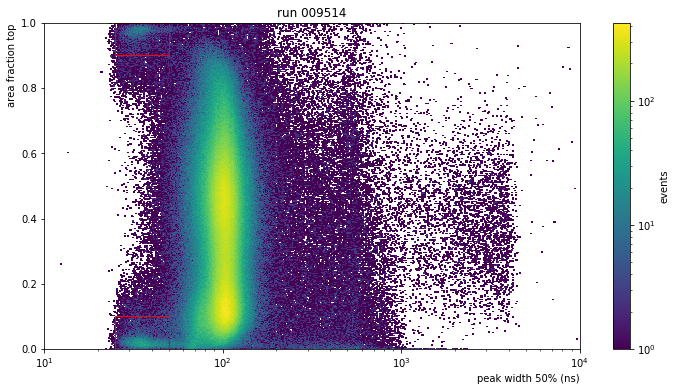

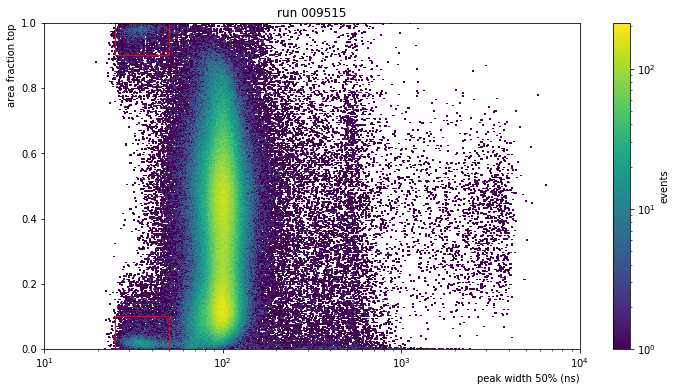

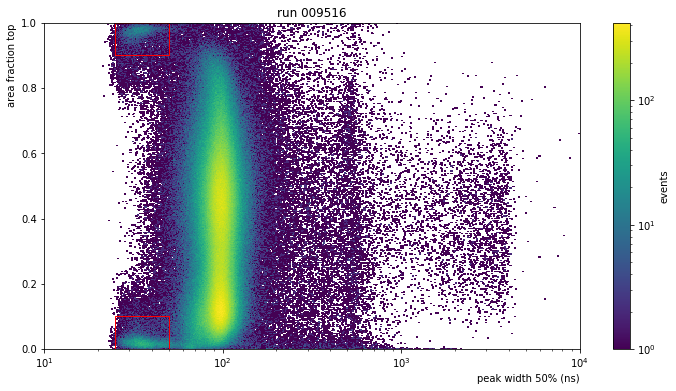

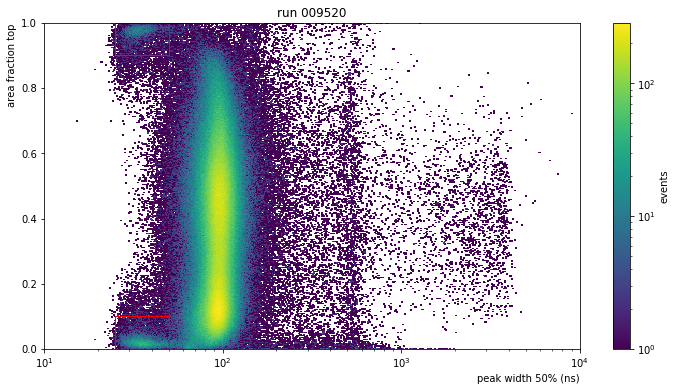

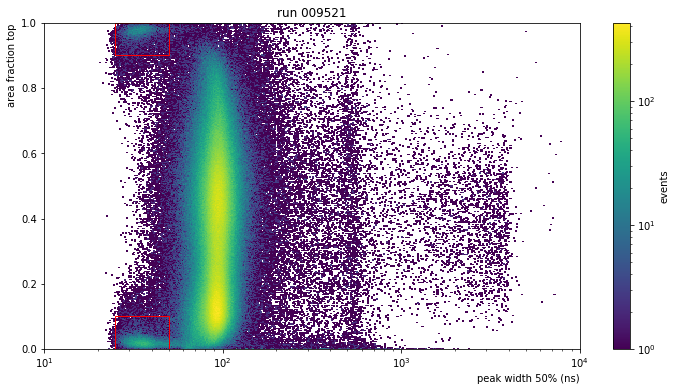

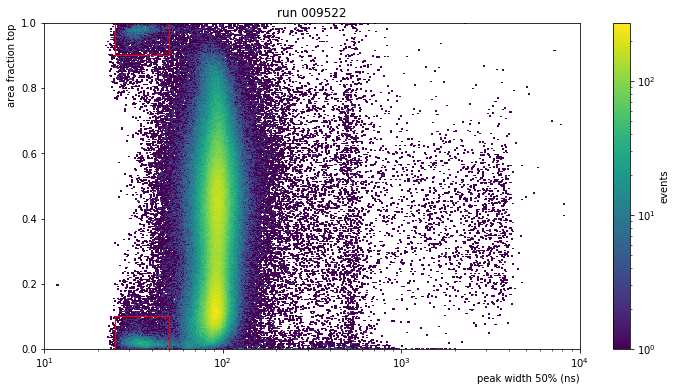

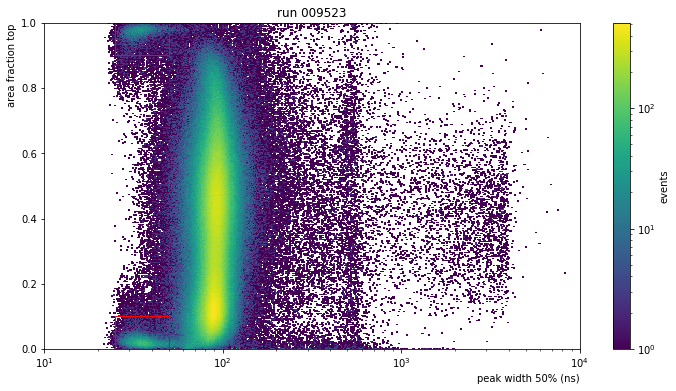

In [11]:
for i, run in enumerate(runs):
    plt.figure(i+1,figsize=(12,6))
    peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
    psu.plot_width_top(peaks,1,4)
    psu.rectangle(width_cut4,(0.0,0.1),'r')
    psu.rectangle(width_cut4,(0.9,1),'r')
    plt.title(f'run {run}')

In [39]:
pmts = (89, 93, 131, 188, 206, 257, 313, 355, 416, 455)
pmts2 = (89, 93, 131, 188, 206, 257, 272, 313, 350, 355, 380, 407, 416, 455, 485)

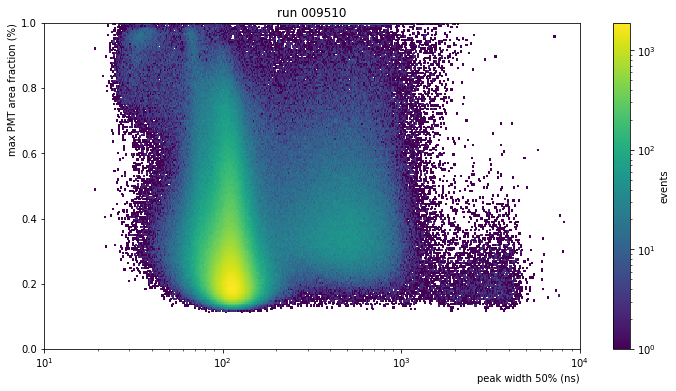

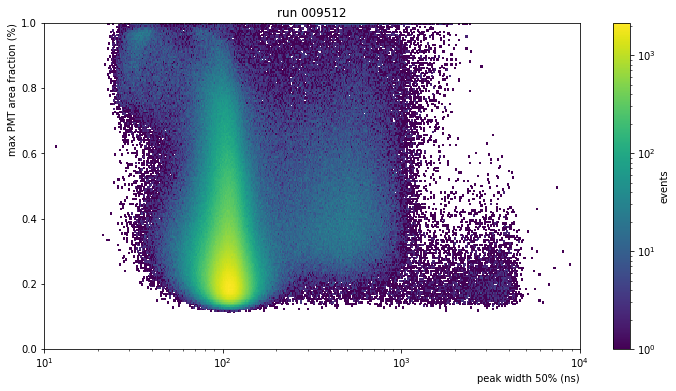

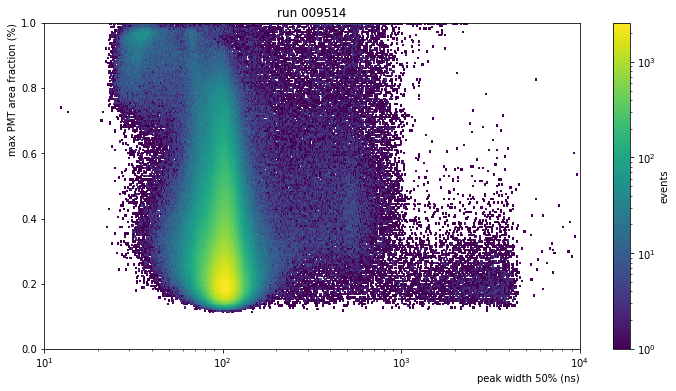

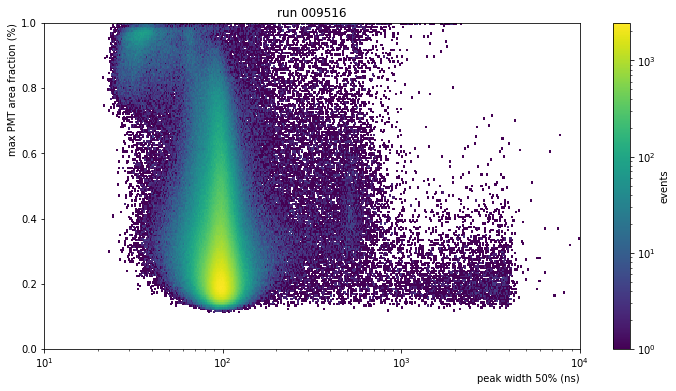

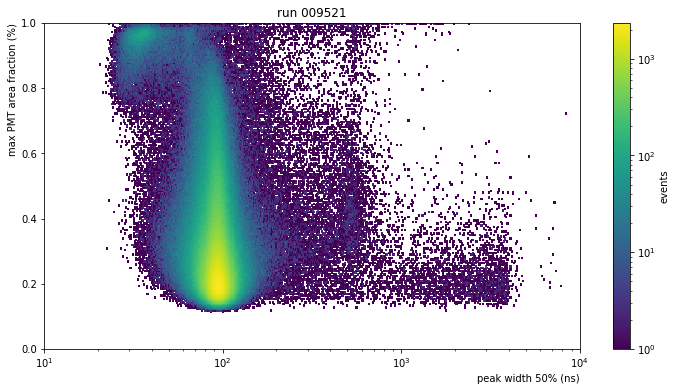

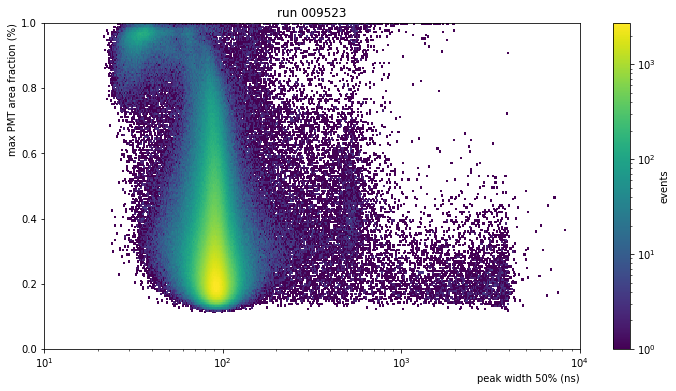

In [22]:
for i, run in enumerate(runs):
    plt.figure(i+1,figsize=(12,6))
    peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)  
    phmax = Histdd(peaks['range_50p_area'], peaks['max_pmt_area']/peaks['area'],
                   bins=(np.logspace(1, 4, 500), np.linspace(0, 1, 200)))
    phmax.plot(log_scale=True, cblabel='events')
    plt.xlabel("peak width 50% (ns)", ha='right', x=1)
    plt.ylabel("max PMT area fraction (%)", ha='right', y=1)
    plt.xscale('log')
    plt.title(f'run {run}')

In [36]:
def count_max(run,pmts):
    n_pmt = 494
    conteggi = np.zeros(n_pmt)
#for i, run in enumerate(runs):
    count = np.zeros(len(pmts))
    peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
    peaks = peaks[(peaks['range_50p_area']<width_cut4[1]) &
                  (peaks['range_50p_area']>width_cut4[0]) &
                  (peaks['area']>area_cut4[0]) &
                  (peaks['area']<area_cut4[1])]
    for j,pmt in enumerate(pmts):
        count[j]=np.count_nonzero(peaks['max_pmt'] == pmt)
        conteggi[pmt]=count[j]
    straxen.plot_pmts(conteggi, label=f'max PMT counts - run {run}',
                  cmap=plt.cm.jet,
                  vmin=0.8, log_scale=False)
        #print('run',run,'PMT n.',pmt,'counts',count[j])
    #plt.plot(pmts,count,label=f'run{run}')

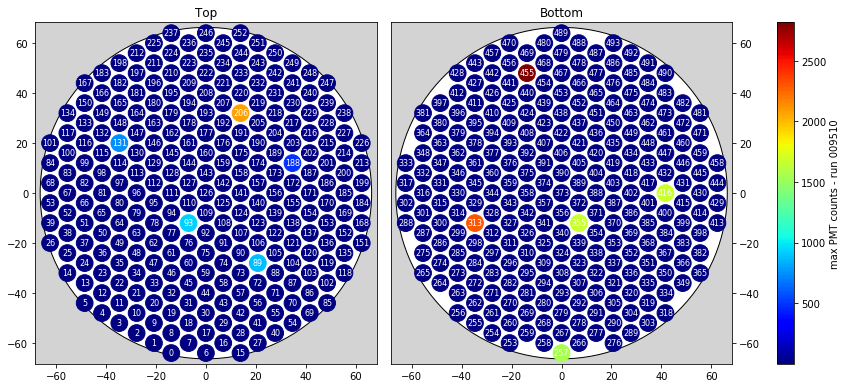

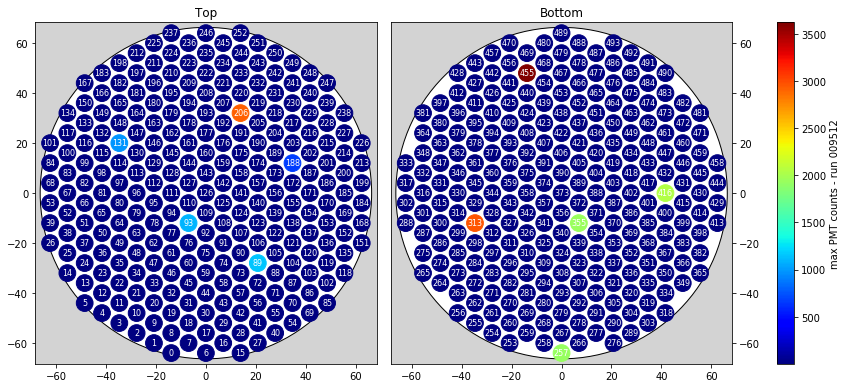

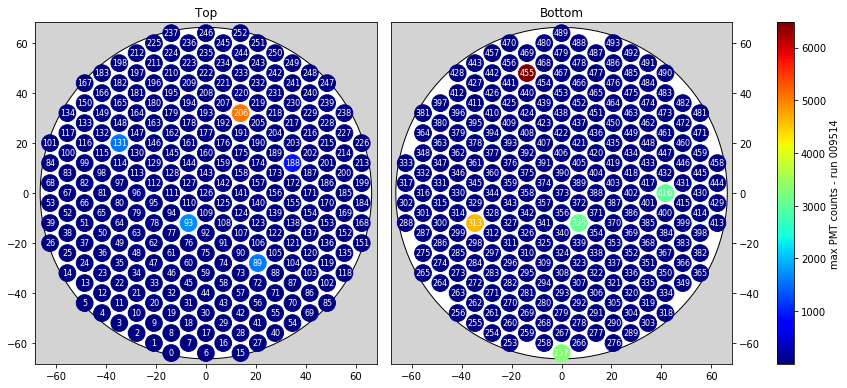

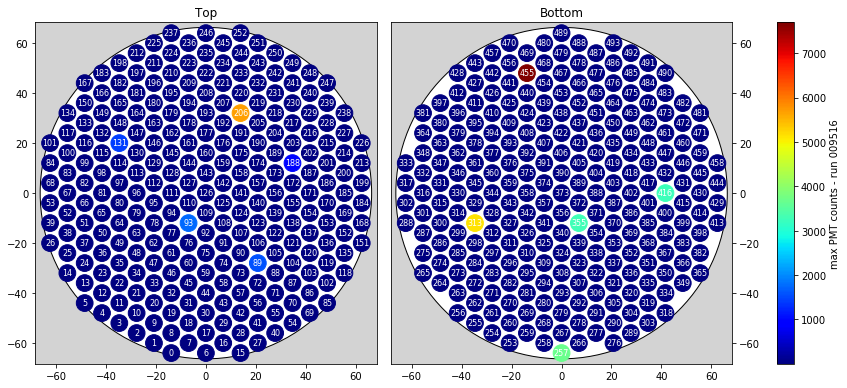

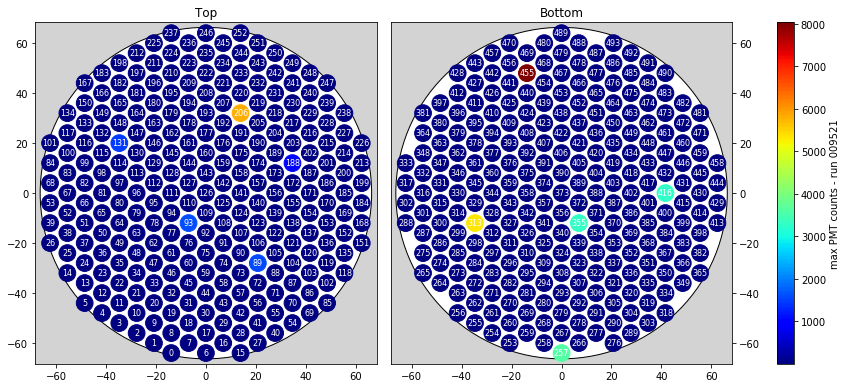

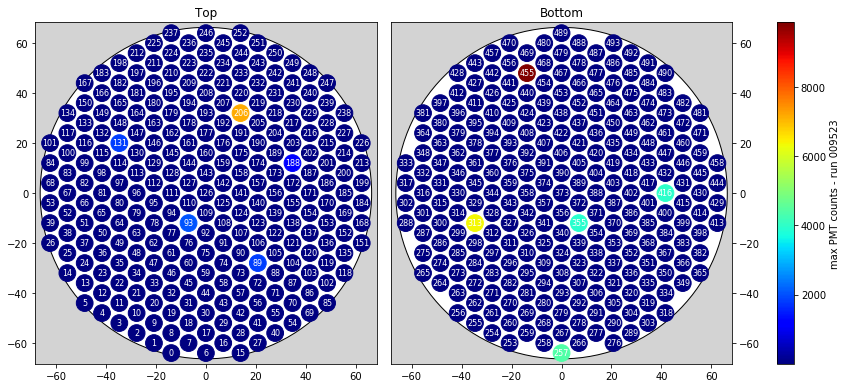

In [37]:
for i, run in enumerate(runs):
    count_max(run,pmts)

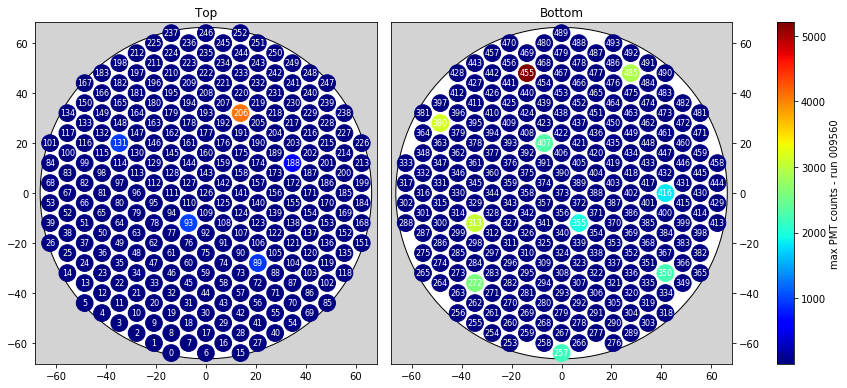

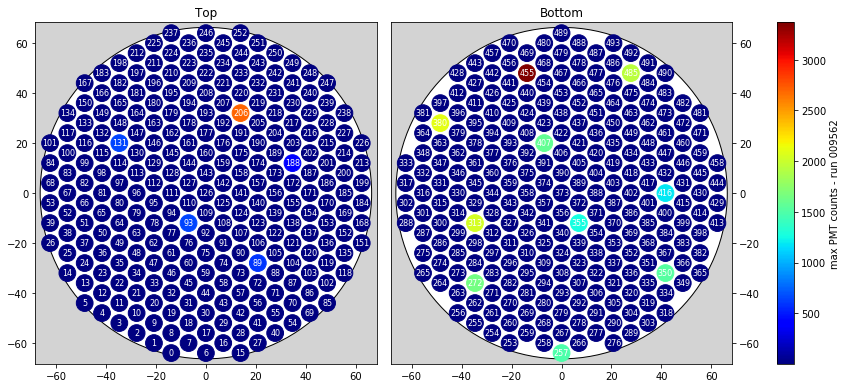

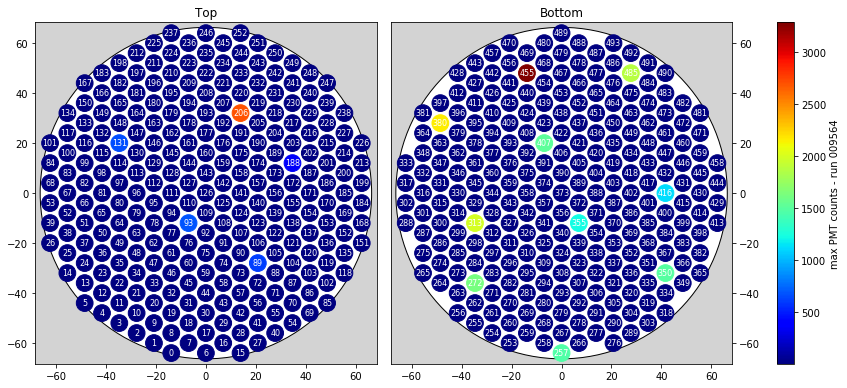

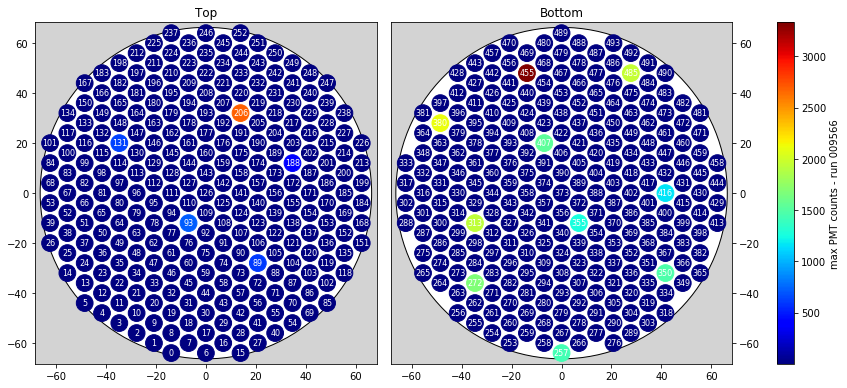

In [40]:
for i, run in enumerate(runs3):
    count_max(run,pmts2)

<Figure size 864x432 with 0 Axes>

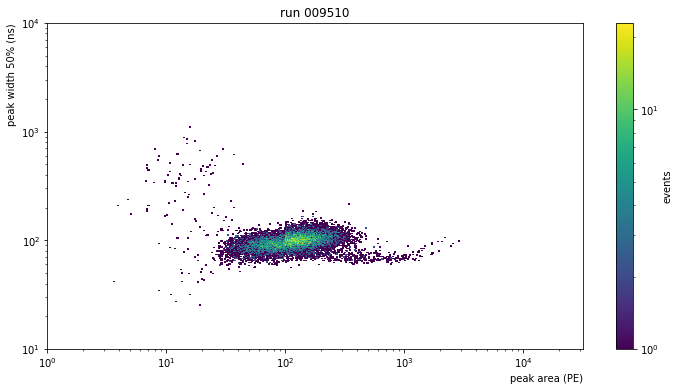

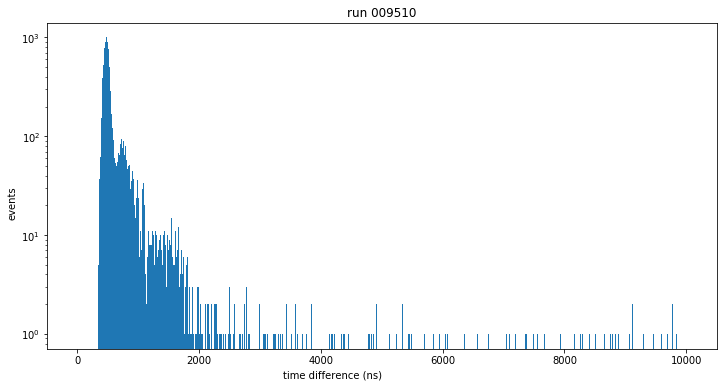

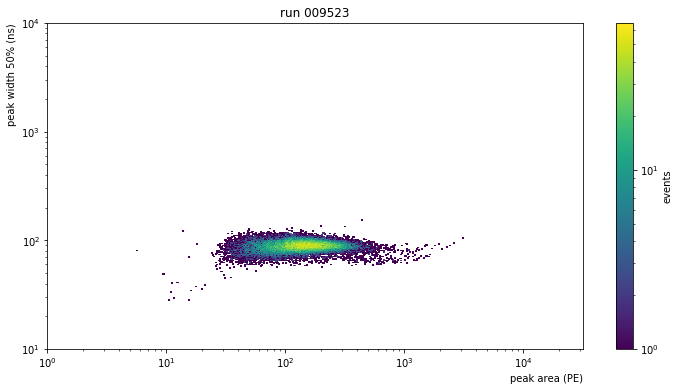

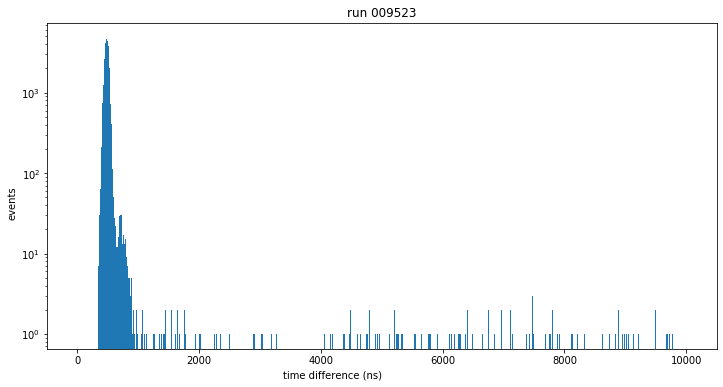

<Figure size 864x432 with 0 Axes>

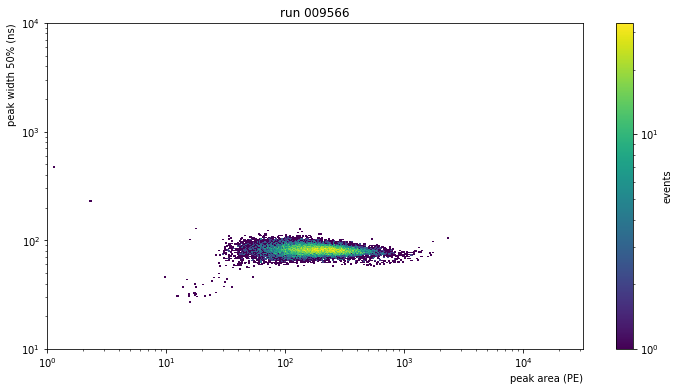

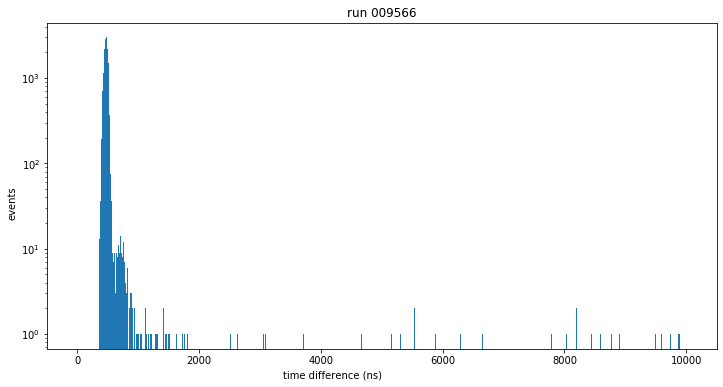

In [119]:
runs0 = ('009510','009523','009566')
for i, run in enumerate(runs0):
    plt.figure(i+1,figsize=(12,6))
    peaks = st.get_array(run, targets = ('peak_basics'), progress_bar=False)
    selection = (peaks['range_50p_area']<width_cut4[1])&(peaks['range_50p_area']>width_cut4[0])
    nev_tot = len(peaks['time'])
    nev = len(peaks['time'][selection])
    diff = np.zeros(nev)
    sel2, difft = np.zeros(len(selection)),np.zeros(len(selection))
    j = 0
    for i, time in enumerate(peaks['time']):
        if i < (nev_tot-1):
            sel2[i]=selection[i+1]
            difft[i] = (peaks['time'][i+1]-peaks['time'][i])
        if selection[i]:
            diff[j]= (peaks['time'][i]-peaks['time'][i-1])
            times[j] = (peaks['time'][i]-peaks['time'][0])
            j += 1
    psu.plot_area_width(peaks[(sel2==1)&(difft<2000)],0,4.5,1,4)
    plt.title(f'run {run}')
    #psu.rectangle(area_cut4,width_cut4,'g')
    plt.figure(i+3,figsize=(12,6))
    plt.hist(diff,bins=1000,range=(0,10000))
    plt.ylabel("events", ha='right', x=1)
    plt.xlabel("time difference (ns)", ha='right', y=1)
    #plt.xscale('log')
    plt.yscale('log')
    plt.title(f'run {run}')